In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
#load data
data = pd.read_csv('training.csv')
testing_data = pd.read_csv('testing.csv')
res_positive = data[data.result == 'Positive']
res_negative = data[data.result == 'Negative']
test_positive = testing_data[testing_data.result == 'Positive']
test_negative = testing_data[testing_data.result == 'Negative']

In [3]:
res_positive_count = res_positive.count().to_numpy()[0]
res_negative_count = res_negative.count().to_numpy()[0]
test_positive_count = test_positive.count().to_numpy()[0]
test_negative_count = test_negative.count().to_numpy()[0]

In [4]:
prior_positive = res_positive_count / data.count().to_numpy()[0]
prior_negative = res_negative_count / data.count().to_numpy()[0]
prior_positive_test = test_positive_count / testing_data.count().to_numpy()[0]
prior_negative_test = test_negative_count / testing_data.count().to_numpy()[0]
print('prior positive train: ' + str(prior_positive))
print('prior negative test: ' + str(prior_negative))
print('prior positive test: ' + str(prior_positive_test))
print('prior negative test: ' + str(prior_negative_test))


prior positive train: 0.3333333333333333
prior negative test: 0.6666666666666666
prior positive test: 0.3333333333333333
prior negative test: 0.6666666666666666


In [5]:
mean_positive = res_positive.mean().to_numpy()[0]
mean_negative = res_negative.mean().to_numpy()[0]
var_positive = res_positive.var().to_numpy()[0]
var_negative = res_negative.var().to_numpy()[0]

mean_positive_test = test_positive.mean().to_numpy()[0]
mean_negative_test = test_negative.mean().to_numpy()[0]
var_positive_test = test_positive.var().to_numpy()[0]
var_negative_test = test_negative.var().to_numpy()[0]

print ('train mean positive: ' + str(mean_positive) + ' \ntrain variance positive: ' + str(var_positive))
print ('train mean negative: ' + str(mean_negative) + ' \ntrain variance negative: ' + str(var_negative))
print ('------------------------------------------------------------------------------')
print ('test mean positive: ' + str(mean_positive_test) + ' \ntest variance positive: ' + str(var_positive_test))
print ('test mean negative: ' + str(mean_negative_test) + ' \ntest variance negative: ' + str(var_negative_test))


train mean positive: 26.566666666666666 
train variance positive: 11.081609195402295
train mean negative: 39.45 
train variance negative: 16.929661016949144
------------------------------------------------------------------------------
test mean positive: 28.066666666666666 
test variance positive: 10.616091954022984
test mean negative: 40.06666666666667 
test variance negative: 18.842937853107344


In [6]:
res_positive_array = res_positive['age'].to_numpy()
res_negative_array = res_negative['age'].to_numpy()

res_positive_array_test = test_positive['age'].to_numpy()
res_negative_array_test = test_negative['age'].to_numpy()

In [7]:
def calculate_likelyhood_array(mu, sigma):
    one_divided_by_2pi_sigma = (1)/(math.sqrt(2 * math.pi * sigma))
    arr = []
    for i in range(60):
        x_minus_mu_squared = (i - mu)**2
        x_minus_mu_squared_divided_by_two_sigma = x_minus_mu_squared /(2*sigma)
        exp_part = math.exp(-(x_minus_mu_squared_divided_by_two_sigma))
        likely_hood_of_the_instance = one_divided_by_2pi_sigma * exp_part
        arr.append(likely_hood_of_the_instance)
    return arr

likelyhoods_positive = calculate_likelyhood_array(mean_positive, var_positive)
likelyhoods_negative = calculate_likelyhood_array(mean_negative, var_negative)
likelyhoods_positive_test = calculate_likelyhood_array(mean_positive_test, var_positive_test)
likelyhoods_negative_test = calculate_likelyhood_array(mean_negative_test, var_negative_test)


Text(0, 0.5, 'likelihood')

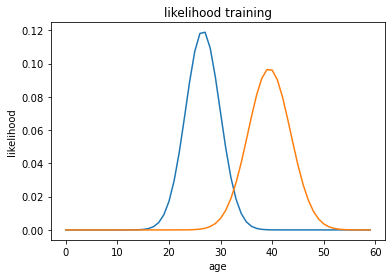

In [8]:
plt.plot(np.arange(0, 60, 1), likelyhoods_positive)
plt.plot(np.arange(0, 60, 1), likelyhoods_negative)
plt.title('likelihood training')
plt.xlabel('age')
plt.ylabel('likelihood')

Text(0, 0.5, 'likelihood')

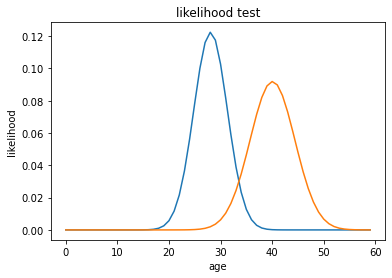

In [9]:
plt.plot(np.arange(0, 60, 1), likelyhoods_positive_test)
plt.plot(np.arange(0, 60, 1), likelyhoods_negative_test)
plt.title('likelihood test')
plt.xlabel('age')
plt.ylabel('likelihood')

In [10]:
def calculate_posterior_array(likelyhood_positive, likelyhood_negative, 
                              prior_positive, prior_negative):
    posterior_positive_array = []
    posterior_negative_array = []
    for i in range(60):
        top_positive = likelyhood_positive[i] * prior_positive
        top_negative = likelyhood_negative[i] * prior_negative
        marginal_probility = (top_positive) + (top_negative)
        posterior_positive_array.append(top_positive / marginal_probility)
        posterior_negative_array.append(top_negative / marginal_probility)
    return posterior_positive_array, posterior_negative_array

posterior_pos, posterior_neg = calculate_posterior_array(likelyhoods_positive, likelyhoods_negative
                                         , prior_positive, prior_negative)
posterior_pos_test, posterior_neg_test = calculate_posterior_array(likelyhoods_positive_test, likelyhoods_negative_test
                                         , prior_positive_test, prior_negative_test)

Text(0, 0.5, 'posterior')

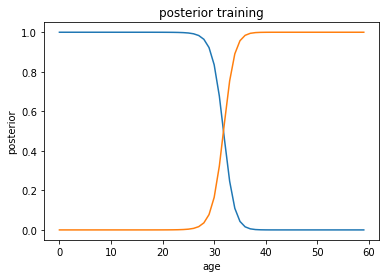

In [11]:
plt.plot(np.arange(0, 60, 1), posterior_pos)
plt.plot(np.arange(0, 60, 1), posterior_neg)
plt.title('posterior training')
plt.xlabel('age')
plt.ylabel('posterior')

Text(0, 0.5, 'posterior')

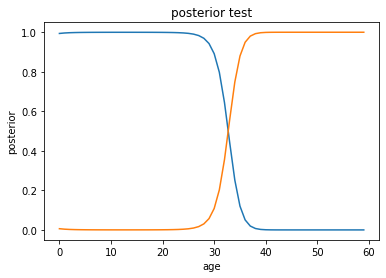

In [12]:
plt.plot(np.arange(0, 60, 1), posterior_pos_test)
plt.plot(np.arange(0, 60, 1), posterior_neg_test)
plt.title('posterior test')
plt.xlabel('age')
plt.ylabel('posterior')

In [13]:
loss_false_positive_a = 1
loss_false_negative_a = 1
loss_false_positive_b = 2
loss_false_negative_b = 1
loss_false_positive_c = 1
loss_false_negative_c = 2

In [14]:
def determine_action_positive(loss_false_positive, loss_false_negative):
    return loss_false_positive / (loss_false_positive + loss_false_negative)

interval_a = determine_action_positive(loss_false_positive_a, loss_false_negative_a)
interval_b = determine_action_positive(loss_false_positive_b, loss_false_negative_b)
interval_c = determine_action_positive(loss_false_positive_c, loss_false_negative_c)

In [15]:
print ('thresholds of decision for choosing a) \n action positive until posterior probility: ' + str(interval_a) + '\n action negative chosen after: ' + str(1- interval_a) + '\n')
print ('thresholds of decision for choosing b) \n action positive until posterior probility: ' + str(interval_b) + '\n action negative chosen after: ' + str(1- interval_b) + '\n')
print ('thresholds of decision for choosing c) \n action positive until posterior probility: ' + str(interval_c) + '\n action negative chosen after: ' + str(1- interval_c))

thresholds of decision for choosing a) 
 action positive until posterior probility: 0.5
 action negative chosen after: 0.5

thresholds of decision for choosing b) 
 action positive until posterior probility: 0.6666666666666666
 action negative chosen after: 0.33333333333333337

thresholds of decision for choosing c) 
 action positive until posterior probility: 0.3333333333333333
 action negative chosen after: 0.6666666666666667


In [16]:
def determine_predictor(posterior_pos, posterior_neg, interval):
    estimator = []
    changed = 0
    for i in range(60):
        if posterior_pos[i] > interval: # choose action 1
            estimator.append('Positive')
        else: # choose action 2
            if changed == 0:
                changed = i
            estimator.append('Negative')
    return estimator, str(changed)
predictor_a, changed_age_a = determine_predictor(posterior_pos, posterior_neg, interval_a)
predictor_b, changed_age_b = determine_predictor(posterior_pos, posterior_neg, interval_b)
predictor_c, changed_age_c = determine_predictor(posterior_pos, posterior_neg, interval_c)

predictor_a_test, _ = determine_predictor(posterior_pos_test, posterior_neg_test, interval_a)
predictor_b_test, _ = determine_predictor(posterior_pos_test, posterior_neg_test, interval_b)
predictor_c_test, _ = determine_predictor(posterior_pos_test, posterior_neg_test, interval_c)

In [17]:
print('age when first assigned negative for a) ' + changed_age_a)
print('age when first assigned negative for b) ' + changed_age_b)
print('age when first assigned negative for c) ' + changed_age_c)

age when first assigned negative for a) 32
age when first assigned negative for b) 32
age when first assigned negative for c) 33


In [18]:
def determine_accuracy(dt, predictor):
    age_array = dt['age'].to_numpy()
    result_array = dt['result'].to_numpy()
    data_length = len(age_array)
    correct_predictions = 0
    false_positive_count = 0
    false_negative_count = 0
    missclassified_ages = []
    
    for i in range(data_length):
        age = age_array[i]
        correct_result = result_array[i]
        prediction = predictor[age]
        
        if prediction == correct_result:
            correct_predictions = correct_predictions + 1
        elif prediction != correct_result and prediction == 'Positive':
            false_positive_count = false_positive_count + 1
            missclassified_ages.append(age)
        else:
            false_negative_count = false_negative_count + 1
            missclassified_ages.append(age)

    accuracy = (correct_predictions / data_length) * 100
    return str(accuracy), false_positive_count, false_negative_count, missclassified_ages

training_acc_a, false_positive_count_train_a, false_negative_count_train_a, miss_age_a = determine_accuracy(data, predictor_a)
training_acc_b, false_positive_count_train_b, false_negative_count_train_b, miss_age_b = determine_accuracy(data, predictor_b)
training_acc_c, false_positive_count_train_c, false_negative_count_train_c, miss_age_c = determine_accuracy(data, predictor_c)

test_acc_a, false_positive_count_test_a, false_negative_count_test_a, miss_age_a_test = determine_accuracy(testing_data, predictor_a_test)
test_acc_b, false_positive_count_test_b, false_negative_count_test_b, miss_age_b_test = determine_accuracy(testing_data, predictor_b_test)
test_acc_c, false_positive_count_test_c, false_negative_count_test_c, miss_age_c_test = determine_accuracy(testing_data, predictor_c_test)

In [19]:
print("training set accuracy of the predictor a): %" + training_acc_a)
print('False positive count train : ' + str(false_positive_count_train_a)
      + ' false negative count train: ' + str(false_negative_count_train_a)
      + '\n missclassified ages: ' + str(miss_age_a))
print('--------------------------------------------------------------------')
print("training set accuracy of the predictor b): %" + training_acc_b)
print('False positive count train : ' + str(false_positive_count_train_b)
      + ' false negative count train: ' + str(false_negative_count_train_b)
      + '\n missclassified ages: ' + str(miss_age_b))
print('--------------------------------------------------------------------')
print("training set accuracy of the predictor c): %" + training_acc_c)
print('False positive count train : ' + str(false_positive_count_train_c)
      + ' false negative count train: ' + str(false_negative_count_train_c)
      + '\n missclassified ages: ' + str(miss_age_c))
print('--------------------------------------------------------------------')

training set accuracy of the predictor a): %94.44444444444444
False positive count train : 3 false negative count train: 2
 missclassified ages: [33, 32, 28, 31, 30]
--------------------------------------------------------------------
training set accuracy of the predictor b): %94.44444444444444
False positive count train : 3 false negative count train: 2
 missclassified ages: [33, 32, 28, 31, 30]
--------------------------------------------------------------------
training set accuracy of the predictor c): %94.44444444444444
False positive count train : 4 false negative count train: 1
 missclassified ages: [33, 28, 32, 31, 30]
--------------------------------------------------------------------


In [20]:
print("test set accuracy of the predictor a): %" + test_acc_a)
print('False positive count test : ' + str(false_positive_count_test_a)
      + ' false negative count test: ' + str(false_negative_count_test_a)
      + '\n missclassified ages: ' + str(miss_age_a_test))
print('--------------------------------------------------------------------')
print("test set accuracy of the predictor b): %" + test_acc_b)
print('False positive count test : ' + str(false_positive_count_test_b)
      + ' false negative count test: ' + str(false_negative_count_test_b)
      + '\n missclassified ages: ' + str(miss_age_b_test))
print('--------------------------------------------------------------------')
print("test set accuracy of the predictor c): %" + test_acc_c)
print('False positive count test : ' + str(false_positive_count_test_c)
      + ' false negative count test: ' + str(false_negative_count_test_c)
      + '\n missclassified ages: ' + str(miss_age_c_test))
print('--------------------------------------------------------------------')

test set accuracy of the predictor a): %93.33333333333333
False positive count test : 3 false negative count test: 3
 missclassified ages: [36, 33, 33, 32, 32, 32]
--------------------------------------------------------------------
test set accuracy of the predictor b): %94.44444444444444
False positive count test : 0 false negative count test: 5
 missclassified ages: [36, 33, 33, 32, 32]
--------------------------------------------------------------------
test set accuracy of the predictor c): %94.44444444444444
False positive count test : 4 false negative count test: 1
 missclassified ages: [36, 32, 33, 32, 32]
--------------------------------------------------------------------


In [21]:
def calculate_total_loss(false_positive_count, loss_false_positive, false_negative_count, loss_false_negative):
    return (false_positive_count * loss_false_positive) + (false_negative_count * loss_false_negative)

total_loss_a_train = calculate_total_loss(false_positive_count_train_a, loss_false_positive_a
                                         ,false_negative_count_train_a, loss_false_negative_a)
total_loss_b_train = calculate_total_loss(false_positive_count_train_b, loss_false_positive_b
                                         ,false_negative_count_train_b, loss_false_negative_b)
total_loss_c_train = calculate_total_loss(false_positive_count_train_c, loss_false_positive_c
                                         ,false_negative_count_train_c, loss_false_negative_c)

total_loss_a_test = calculate_total_loss(false_positive_count_test_a, loss_false_positive_a
                                         ,false_negative_count_test_a, loss_false_negative_a)
total_loss_b_test = calculate_total_loss(false_positive_count_test_b, loss_false_positive_b
                                         ,false_negative_count_test_b, loss_false_negative_b)
total_loss_c_test = calculate_total_loss(false_positive_count_test_c, loss_false_positive_c
                                         ,false_negative_count_test_c, loss_false_negative_c)

In [22]:
print('total loss on train a) ' + str(total_loss_a_train))
print('total loss on train b) ' + str(total_loss_b_train))
print('total loss on train c) ' + str(total_loss_c_train))

total loss on train a) 5
total loss on train b) 8
total loss on train c) 6


In [23]:
print('total loss on test a) ' + str(total_loss_a_test))
print('total loss on test b) ' + str(total_loss_b_test))
print('total loss on test c) ' + str(total_loss_c_test))

total loss on test a) 6
total loss on test b) 5
total loss on test c) 6


In [24]:
print('total loss on test + train a) ' + str(total_loss_a_train + total_loss_a_test))
print('total loss on test + train b) ' + str(total_loss_b_train + total_loss_b_test))
print('total loss on test + train c) ' + str(total_loss_c_train + total_loss_c_test))

total loss on test + train a) 11
total loss on test + train b) 13
total loss on test + train c) 12
